In [19]:
import pandas as pd

# 시도지역코드 불러오기

In [20]:
sido = pd.read_csv('data\시도지역코드.csv',encoding='EUC_kr')
sido.head()

,시도지역코드,지역명
0,11,서울
1,26,부산
2,27,대구
3,28,인천
4,29,광주


In [21]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도지역코드  17 non-null     int64 
 1   지역명     17 non-null     object
dtypes: int64(1), object(1)
memory usage: 404.0+ bytes


# 시도별 진료정보 불러오기

In [22]:
import os

path = 'data/'
file_list = os.listdir(path)
# file_list

df=pd.DataFrame()
keywords = ['감기','눈병','천식','피부염']

for i in file_list:
    if i.endswith('_시도.csv'):
        # print(i)
        data = pd.read_csv(path+i, encoding='euc-kr')

        # if '감기' in i:
        #     data['구분']='감기'
        # elif '눈병' in i:
        #     data['구분']='눈병'
        # elif '천식' in i:
        #     data['구분']='천식'
        # elif '피부염' in i:
        #     data['구분']='피부염'
        for key in keywords:
            if key in i:
                data['구분']=key
                break
           
        df = pd.concat([df,data])



In [23]:
df.head()
df.shape


(141588, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141588 entries, 0 to 35396
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
dtypes: float64(2), object(2)
memory usage: 5.4+ MB


In [25]:
df.columns

Index(['날짜', '시도지역코드', '발생건수(건)', '구분'], dtype='object')

In [26]:
sido.columns

Index(['시도지역코드', '지역명'], dtype='object')

In [27]:
# 시도지역코드의 지역명 표시
data_mearge = pd.merge(df,sido,how='left',on='시도지역코드')

In [28]:
data_mearge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명
0,2023-10-01,11.0,17218.0,감기,서울
1,2023-10-01,26.0,5699.0,감기,부산
2,2023-10-01,27.0,3590.0,감기,대구
3,2023-10-01,28.0,7524.0,감기,인천
4,2023-10-01,29.0,3044.0,감기,광주


In [29]:
data_mearge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141588 entries, 0 to 141587
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       10264 non-null   object 
 1   시도지역코드   10264 non-null   float64
 2   발생건수(건)  10264 non-null   float64
 3   구분       141588 non-null  object 
 4   지역명      10264 non-null   object 
dtypes: float64(2), object(3)
memory usage: 5.4+ MB


In [30]:
data_mearge['지역명'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '전국', nan], dtype=object)

In [31]:
data_mearge['년/월'] = data_mearge['날짜'].str[:7]
data_mearge.head()

,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10


In [32]:
dfdata = data_mearge[data_mearge['지역명'] != '전국']

In [35]:
dfdata

,날짜,시도지역코드,발생건수(건),구분,지역명,년/월
0,2023-10-01,11.0,17218.0,감기,서울,2023-10
1,2023-10-01,26.0,5699.0,감기,부산,2023-10
2,2023-10-01,27.0,3590.0,감기,대구,2023-10
3,2023-10-01,28.0,7524.0,감기,인천,2023-10
4,2023-10-01,29.0,3044.0,감기,광주,2023-10
...,...,...,...,...,...,...
141583,NaN,NaN,NaN,피부염,NaN,NaN
141584,NaN,NaN,NaN,피부염,NaN,NaN
141585,NaN,NaN,NaN,피부염,NaN,NaN
141586,NaN,NaN,NaN,피부염,NaN,NaN


## 결측값 행/열 삭제
* 변수명.dropna(axis=0/1, how='any'/'all')

In [40]:
dfdata.isnull().sum()

날짜         0
시도지역코드     0
발생건수(건)    0
구분         0
지역명        0
년/월        0
dtype: int64

In [39]:
dfdata.dropna(axis=0,how='any',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3228\2155363050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata.dropna(axis=0,how='any',inplace=True)


In [41]:
# 년/월, 구분별 발생건수의 평균

yearmonthdf = dfdata.groupby(['년/월','구분'],as_index=False)[['발생건수(건)']].mean()

In [43]:
dfdata['년/월'].unique()

array(['2023-10', '2023-11', '2023-12', '2024-01', '2024-02'],
      dtype=object)

In [44]:
yearmonthdf.head()

,년/월,구분,발생건수(건)
0,2023-10,감기,29373.596349
1,2023-10,눈병,2077.245436
2,2023-10,천식,1099.300203
3,2023-10,피부염,2833.022312
4,2023-11,감기,35412.163866


       년/월   구분       발생건수(건)
4  2023-11   감기  35412.163866
5  2023-11   눈병   1959.560924
6  2023-11   천식   1288.512605
7  2023-11  피부염   2609.516807


<Axes: xlabel='구분'>

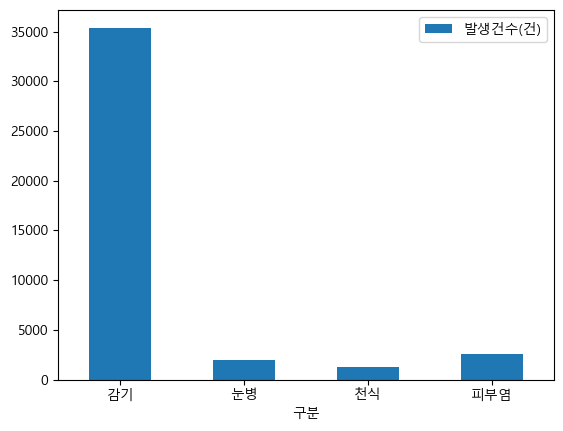

In [49]:
import matplotlib.pyplot as plt
plt.rc('font',family='malgun gothic')

yearmonthin = input('조회 년/월 입력>> ')
yearmonthsearch = yearmonthdf[yearmonthdf['년/월']==yearmonthin]
print(yearmonthsearch)
yearmonthsearch.plot(kind='bar',x='구분', rot=0, title=yearmonthin+' 현황')